In [11]:
import os
import sys
import config
import pandas as pd
from fbprophet import Prophet


In [13]:
path = getattr(config,'path','default_value')
data_file = path+'/data/example_wp_log_peyton_manning.csv'
df = pd.read_csv(data_file)
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [26]:
m = Prophet()
m.fit(df)
old_stdout = sys.stdout
sys.stdout = open(path+'/logs/jupyter_output.log', 'w')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.206497    7.440276    8.890577
3266 2017-01-16  8.531523    7.772624    9.233122
3267 2017-01-17  8.318930    7.556869    9.017003
3268 2017-01-18  8.151543    7.434820    8.869049
3269 2017-01-19  8.163477    7.435972    8.876642

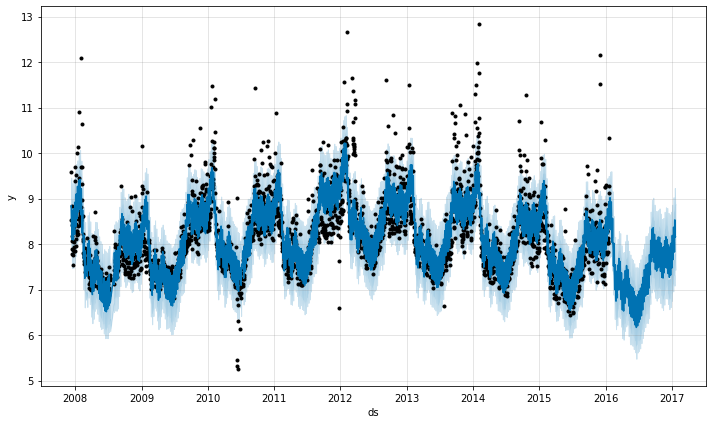

In [29]:
fig1 = m.plot(forecast)

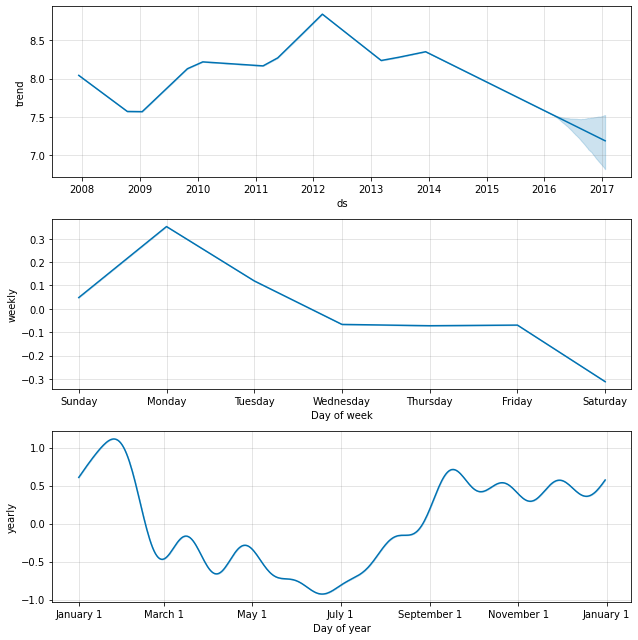

In [30]:
fig2 = m.plot_components(forecast)

In [31]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [32]:
# Seasonality, Holiday Effects, And Regressors
## Modeling Holidays and Special Events

In [95]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [88]:
m = Prophet(holidays = holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
#forecast[forecast.ds == '2008-01-13']

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
34 2008-01-13  7.979066    8.294569    9.531127     7.979066     7.979066   

    additive_terms  additive_terms_lower  additive_terms_upper  holidays  ...  \
34        0.953995              0.953995              0.953995       0.0  ...   

      weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
34  0.048303      0.048303      0.048303  0.905692      0.905692   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
34      0.905692                   0.0                         0.0   

    multiplicative_terms_upper      yhat  
34                         0.0  8.933061  

[1 rows x 28 columns]

In [90]:
list_of_holidays = ['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']
forecast.loc[forecast['ds'].isin(list_of_holidays)]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
34   2008-01-13  7.979066    8.294569    9.531127     7.979066     7.979066   
361  2009-01-03  7.569736    7.298762    8.554341     7.569736     7.569736   
730  2010-01-16  8.205329    8.312299    9.522988     8.205329     8.205329   
750  2010-02-07  8.217736    8.341177    9.629738     8.217736     8.217736   
1076 2011-01-08  8.163981    7.999676    9.227499     8.163981     8.163981   
1806 2013-01-12  8.319387    8.241731    9.567838     8.319387     8.319387   
2169 2014-01-12  8.315150    8.627466    9.853281     8.315150     8.315150   
2176 2014-01-19  8.308000    8.766338   10.034149     8.308000     8.308000   
2190 2014-02-02  8.293700    8.647110    9.943058     8.293700     8.293700   
2532 2015-01-11  7.943348    8.227253    9.486168     7.943348     7.943348   
2901 2016-01-17  7.564396    7.970424    9.249316     7.564396     7.564396   
2908 2016-01-24  7.557246    8.119748    9.316058     7.557246     7.557246   
2922 2016-02-07  7.542946    7.668004    8.931815     7.542946     7.542946   

      additive_terms  additive_terms_lower  additive_terms_upper  holidays  \
34          0.953995              0.953995              0.953995       0.0   
361         0.352627              0.352627              0.352627       0.0   
730         0.674873              0.674873              0.674873       0.0   
750         0.755693              0.755693              0.755693       0.0   
1076        0.474031              0.474031              0.474031       0.0   
1806        0.587930              0.587930              0.587930       0.0   
2169        0.941847              0.941847              0.941847       0.0   
2176        1.095442              1.095442              1.095442       0.0   
2190        1.024419              1.024419              1.024419       0.0   
2532        0.910955              0.910955              0.910955       0.0   
2901        1.045681              1.045681              1.045681       0.0   
2908        1.155999              1.155999              1.155999       0.0   
2922        0.788432              0.788432              0.788432       0.0   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
34    ...  0.048303      0.048303      0.048303  0.905692      0.905692   
361   ... -0.311704     -0.311704     -0.311704  0.664331      0.664331   
730   ... -0.311704     -0.311704     -0.311704  0.986577      0.986577   
750   ...  0.048303      0.048303      0.048303  0.707391      0.707391   
1076  ... -0.311704     -0.311704     -0.311704  0.785735      0.785735   
1806  ... -0.311704     -0.311704     -0.311704  0.899634      0.899634   
2169  ...  0.048303      0.048303      0.048303  0.893544      0.893544   
2176  ...  0.048303      0.048303      0.048303  1.047140      1.047140   
2190  ...  0.048303      0.048303      0.048303  0.976116      0.976116   
2532  ...  0.048303      0.048303      0.048303  0.862652      0.862652   
2901  ...  0.048303      0.048303      0.048303  0.997378      0.997378   
2908  ...  0.048303      0.048303      0.048303  1.107696      1.107696   
2922  ...  0.048303      0.048303      0.048303  0.740129      0.740129   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
34        0.905692                   0.0                         0.0   
361       0.664331                   0.0                         0.0   
730       0.986577                   0.0                         0.0   
750       0.707391                   0.0                         0.0   
1076      0.785735                   0.0                         0.0   
1806      0.899634                   0.0                         0.0   
2169      0.893544                   0.0                         0.0   
2176      1.047140                   0.0                         0.0   
2190      0.976116                   0.0                         0.0   
2532      0.862652                   0.0  

In [99]:
forecast[(forecast['playoff'] + forecast['superbowl']) > 0][['ds', 'playoff', 'superbowl']][-10:]

Empty DataFrame
Columns: [ds, playoff, superbowl]
Index: []

In [100]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


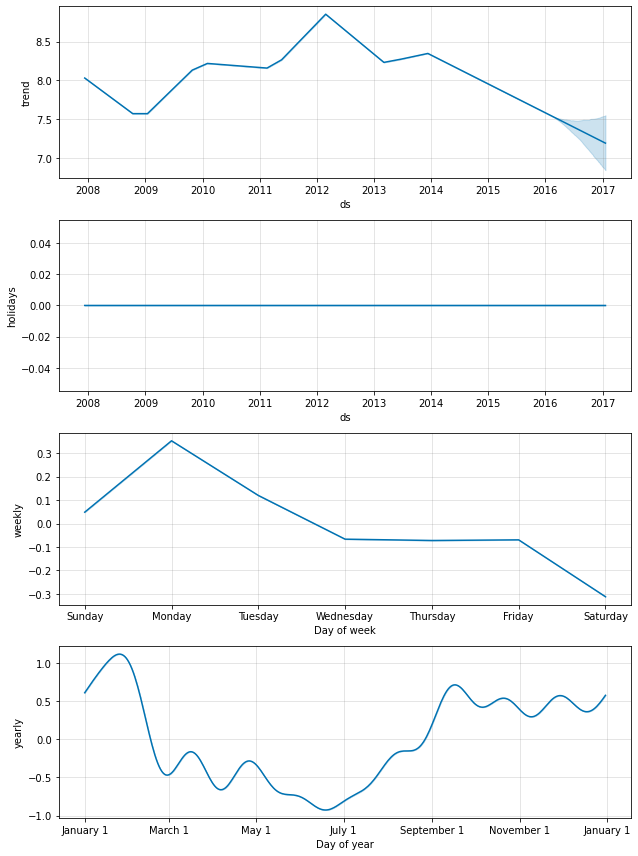

In [101]:
fig9 = m.plot_components(forecast)

In [73]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

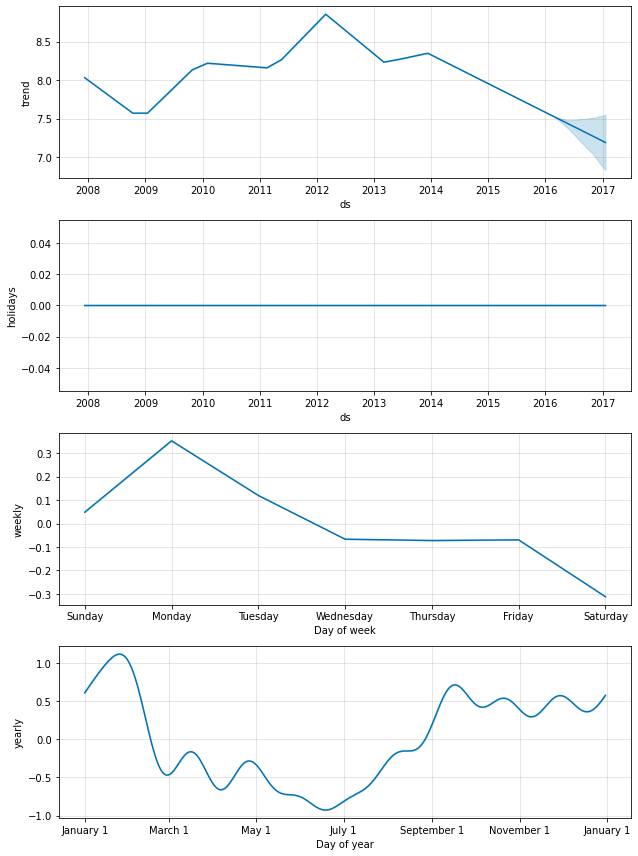

In [74]:
forecast = m.predict(future)
fig10 = m.plot_components(forecast)

### Fourier order for seasonality

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


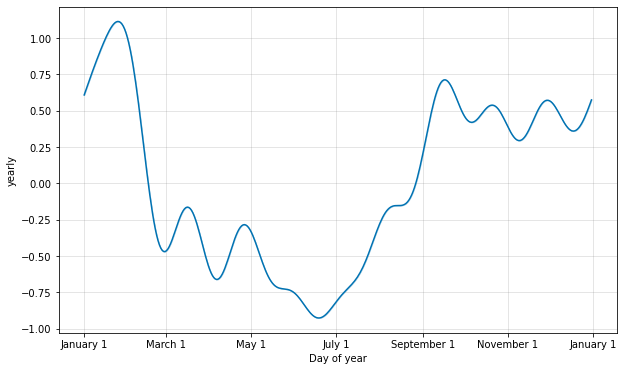

In [76]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


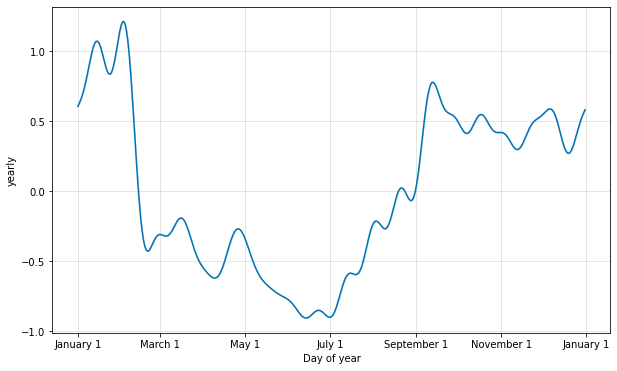

In [78]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

## Specifying Custom Seasonalities

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


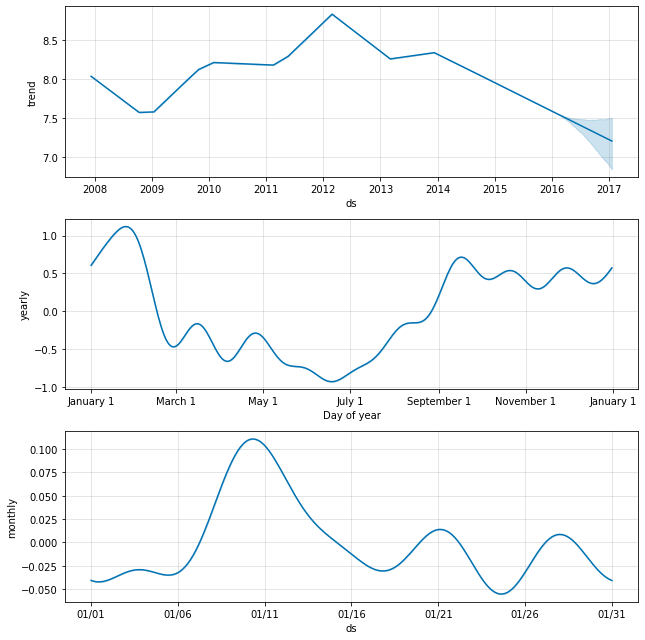

In [79]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

## Seasonality that depends on other factors

In [80]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


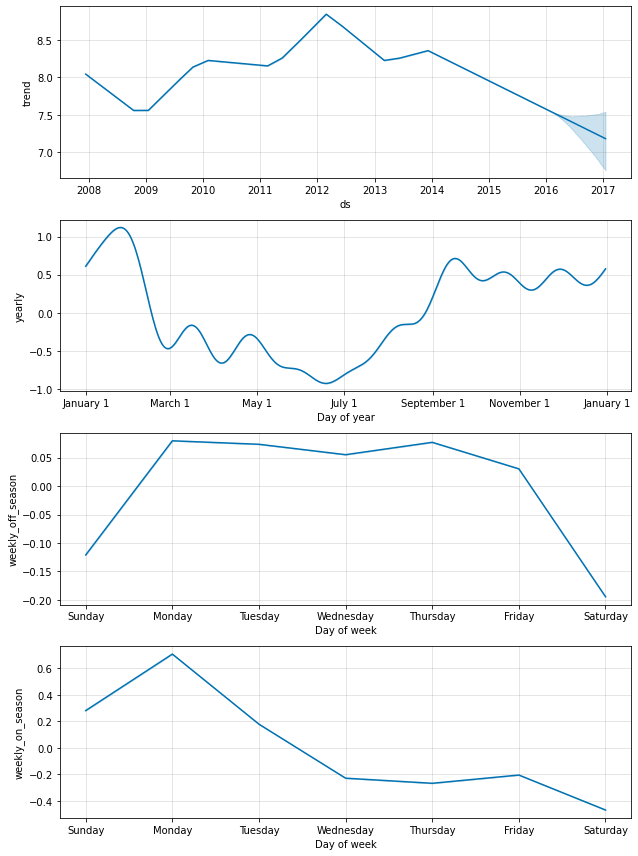

In [81]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

## Prior scale for holidays and seasonalities

In [82]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Empty DataFrame
Columns: [ds, playoff, superbowl]
Index: []

In [83]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

## Additional regressors

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


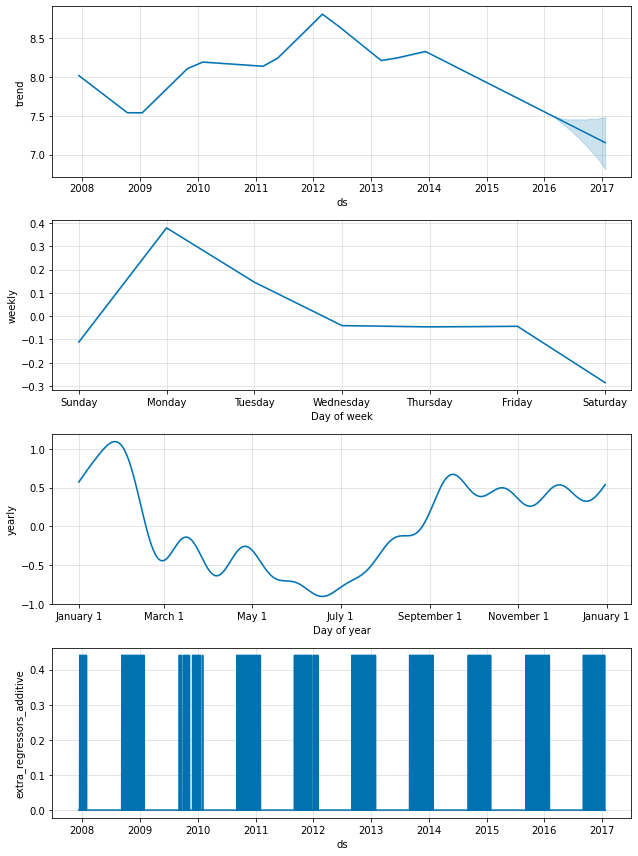

In [84]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

# Trend Changepoints

    Real-time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

### Automatic changepoint detection in Prophet

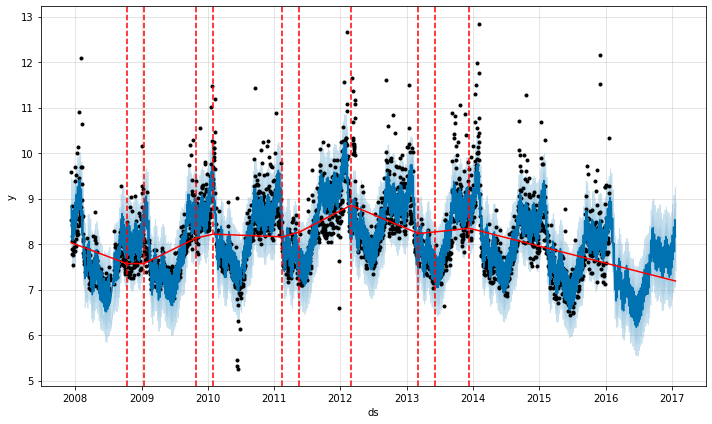

In [38]:
from fbprophet.plot import add_changepoints_to_plot
fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)
sys.stdout = old_stdout
# Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. Consider the Peyton Manning forecast from the Quickstart. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

    By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the changepoint_range argument. For example, m = Prophet(changepoint_range=0.9)

#### Adjusting trend flexibility

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


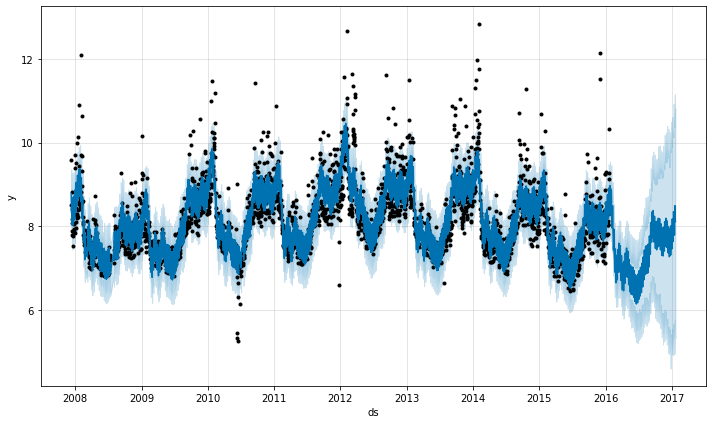

In [39]:
# If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig4 = m.plot(forecast)

###### Decreasing it will make the trend less flexible:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


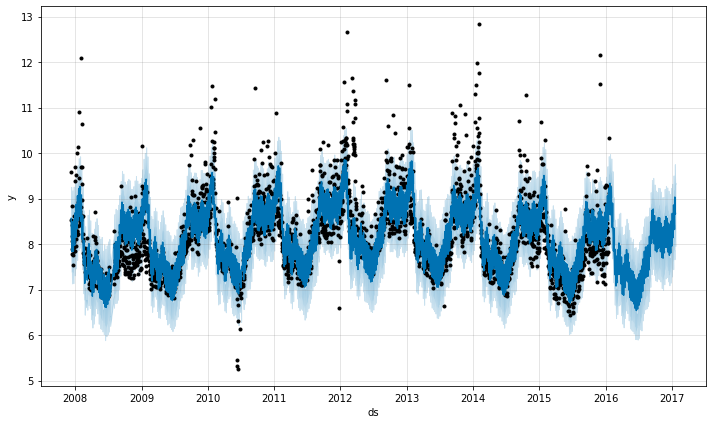

In [40]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig5 = m.plot(forecast)

## Specifying the locations of the changepoints
### Controlling changepoint detection in Prophet
    If you wish to have finer control over the changepoint detection process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


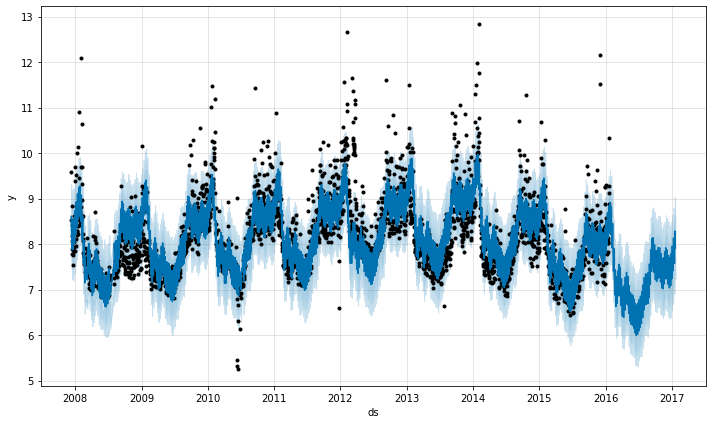

In [41]:
# If you wish, rather than using automatic changepoint detection you can manually specify the locations of potential changepoints with the changepoints argument. Slope changes will then be allowed only at these points, with the same sparse regularization as before. One could, for instance, create a grid of points as is done automatically, but then augment that grid with some specific dates that are known to be likely to have changes. As another example, the changepoints could be entirely limited to a small set of dates, as is done here:

m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

---------------
# Saturating Forecasts
---------------

## Forecasting Growth

    Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

     Using a logistic growth trend model, with a specified carrying capacity.

In [42]:
df_saturating_forecasting = pd.read_csv(path+'/data/example_wp_log_R.csv')

    Specify the carrying capacity in a column named cap, for every row in the dataframe, (it does not have to be constant). If the market size is growing, then cap can be an increasing sequence. Assume a particular value, but this would usually be set using data or expertise about the market size.

In [43]:
df_saturating_forecasting['cap'] = 8.5

    Fit the model passing in an additional argument to specify logistic growth:

In [44]:
m_growth = Prophet(growth='logistic')
m_growth.fit(df_saturating_forecasting)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Make a dataframe for future predictions and specify the capacity in the future. (Here we keep capacity constant at the same value as in the history, and forecast 5 years into the future):

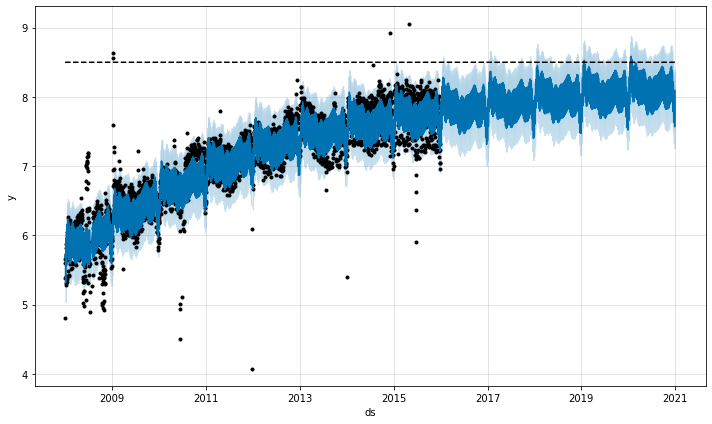

In [45]:
future_growth = m_growth.make_future_dataframe(periods=1826)
future_growth['cap'] = 8.5
fcst = m_growth.predict(future_growth)
fig6 = m_growth.plot(fcst)

    The logistic function has an implicit minimum of 0, and will saturate at 0 the same way that it saturates at the capacity. It is possible to also specify a different saturating minimum.

### Saturating Minimum

    The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


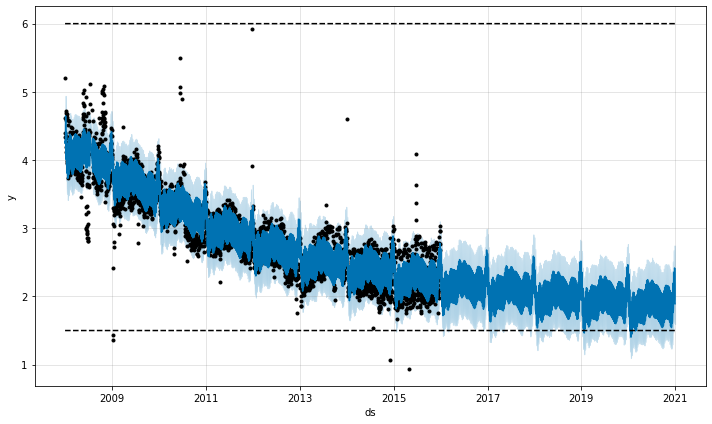

In [46]:
df_saturating_forecasting['y'] = 10 - df_saturating_forecasting['y']
df_saturating_forecasting['cap'] = 6
df_saturating_forecasting['floor'] = 1.5
future_growth['cap'] = 6
future_growth['floor'] = 1.5
m_growth = Prophet(growth='logistic')
m_growth.fit(df_saturating_forecasting)
fcst = m_growth.predict(future_growth)
fig7 = m_growth.plot(fcst)

###### To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.

# Multiplicative Seasonality (air passengers dataframe)

###### By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


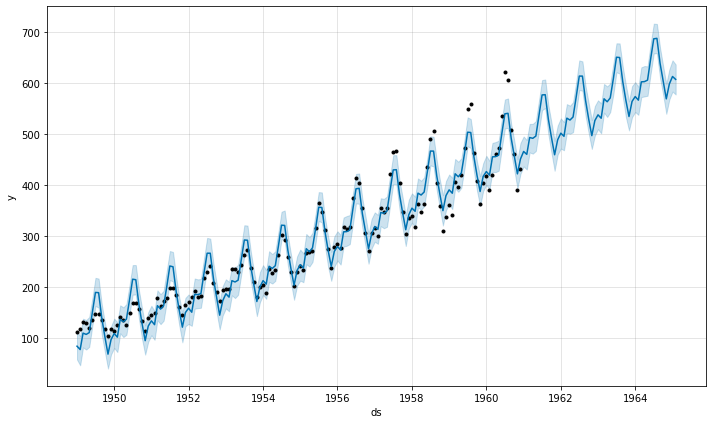

In [103]:
df_air_passengers = pd.read_csv(path+'/data/example_air_passengers.csv')
m_air_passengers = Prophet()
m_air_passengers.fit(df_air_passengers)
future_air_passengers = m_air_passengers.make_future_dataframe(50, freq='MS')
forecast_air_passengers = m_air_passengers.predict(future_air_passengers)
fig13 = m_air_passengers.plot(forecast_air_passengers)


    This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

    Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the input arguments:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


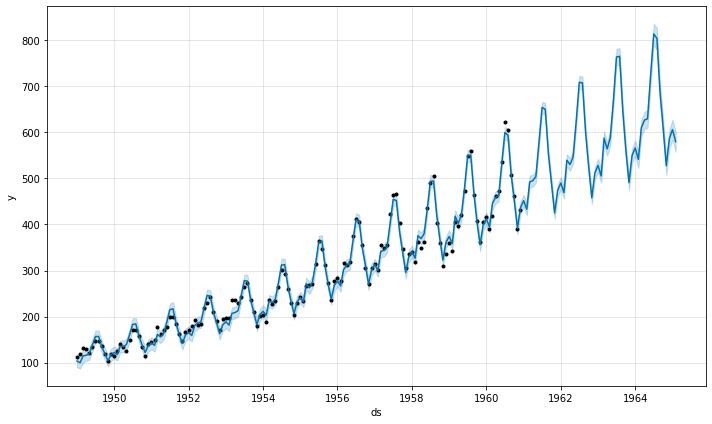

In [104]:
m_air_passengers = Prophet(seasonality_mode='multiplicative')
m_air_passengers.fit(df_air_passengers)
forecast_air_passengers = m_air_passengers.predict(future_air_passengers)
fig14 = m_air_passengers.plot(forecast_air_passengers)

###### The components figure will now show the seasonality as a percent of the trend:

/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/fbprophet/plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



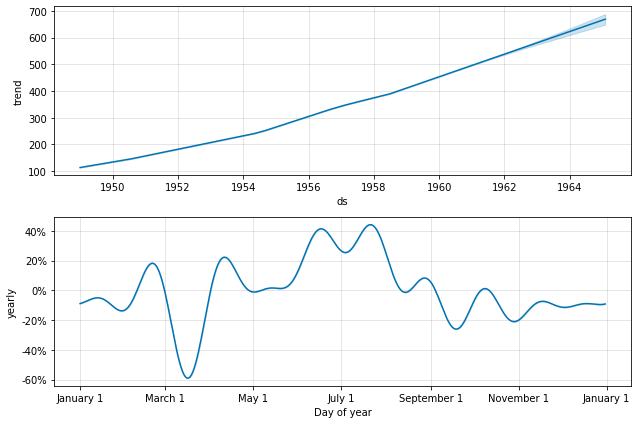

In [105]:
fig15 = m_air_passengers.plot_components(forecast_air_passengers)

    With seasonality_mode='multiplicative', holiday effects will also be modeled as multiplicative. Any added seasonalities or extra regressors will by default use whatever seasonality_mode is set to, but can be overriden by specifying mode='additive' or mode='multiplicative' as an argument when adding the seasonality or regressor.

    For example, this block sets the built-in seasonalities to multiplicative, but includes an additive quarterly seasonality and an additive regressor

In [106]:
m_air_passengers = Prophet(seasonality_mode='multiplicative')
m_air_passengers.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m_air_passengers.add_regressor('regressor', mode='additive')

###### Additive and multiplicative extra regressors will show up in separate panels on the components plot.

# Uncertainty Intervals

    By default Prophet will return uncertainty intervals for the forecast yhat. There are several important assumptions behind these uncertainty intervals.

    There are three sources of uncertainty in the forecast: uncertainty in the trend, uncertainty in the seasonality estimates, and additional observation noise.

## Uncertainty in the trend

    The biggest source of uncertainty in the forecast is the potential for future trend changes. The time series we have seen already in this documentation show clear trend changes in the history. Prophet is able to detect and fit these, but what trend changes should we expect moving forward? It’s impossible to know for sure, so we do the most reasonable thing we can, and we assume that the future will see similar trend changes as the history. In particular, we assume that the average frequency and magnitude of trend changes in the future will be the same as that which we observe in the history. We project these trend changes forward and by computing their distribution we obtain uncertainty intervals.

    One property of this way of measuring uncertainty is that allowing higher flexibility in the rate, by increasing changepoint_prior_scale, will increase the forecast uncertainty. This is because if we model more rate changes in the history then we will expect more in the future, and makes the uncertainty intervals a useful indicator of overfitting.

    The width of the uncertainty intervals (by default 80%) can be set using the parameter interval_width:

In [108]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Again, these intervals assume that the future will see the same frequency and magnitude of rate changes as the past. This assumption is probably not true, so you should not expect to get accurate coverage on these uncertainty intervals.

## Uncertainty in the seasonality

    By default Prophet will only return uncertainty in the trend and observation noise. To get uncertainty in seasonality, you must do full Bayesian sampling. This is done using the parameter mcmc.samples (which defaults to 0). We do this here for the first six months of the Peyton Manning data from the Quickstart:

In [ ]:
#m = Prophet(mcmc_samples=300)
#forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#fig = m.plot_components(forecast)

    You can access the raw posterior predictive samples in Python using the method m.predictive_samples(future), or in R using the function predictive_samples(m, future).

    There are upstream issues in PyStan for Windows which make MCMC sampling extremely slow. The best choice for MCMC sampling in Windows is to use R, or Python in a Linux VM.

# Outliers

     There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

In [ ]:
df_outliers = pd.read_csv(path+'/data/example_wp_log_R_outliers1.csv')
m_outliers = Prophet()
m_outliers.fit(df_outliers)
future_outliers = m_outliers.make_future_dataframe(periods=1096)
forecast_outliers = m_outliers.predict(future_outliers)
fig19 = m_outliers.plot(forecast_outliers)

    The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

    The best way to handle outliers is to remove them - Prophet has no problem with missing data. If you set their values to NA in the history but leave the dates in future, then Prophet will give you a prediction for their values.

df_outliers.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model_outliers = Prophet().fit(df_outliers)
fig = model_outliers.plot(model_outliers.predict(future_outliers))

    In the above example the outliers messed up the uncertainty estimation but did not impact the main forecast yhat. This isn’t always the case, as in this example with added outliers:

# Non-Daily Data

## Sub-daily

    Prophet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be YYYY-MM-DD HH:MM:SS - see the example csv here. When sub-daily data are used, daily seasonality will automatically be fit. Here we fit Prophet to data with 5-minute resolution (daily temperatures at Yosemite):

In [ ]:
df_yosemite = pd.read_csv(path+'/data/example_yosemite_temps.csv')
m_yosemite = Prophet(changepoint_prior_scale=0.01).fit(df_yosemite)
future_yosemite = m_yosemite.make_future_dataframe(periods=300, freq='H')
fcst = m_yosemite.predict(future_yosemite)
fig = m_yosemite.plot(fcst)

    The daily seasonality will show up in the components plot:

In [ ]:
fig = m_yosemite.plot_components(fcst)

## Data with regular gaps

    Suppose the dataset above only had observations from 12a to 6a:

In [ ]:
df2 = df_yosemite.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m_yosemite_2 = Prophet().fit(df2)
future_yosemite_2 = m_yosemite_2.make_future_dataframe(periods=300, freq='H')
fcst = m_yosemite_2.predict(future_yosemite_2)
fig = m_yosemite_2.plot(fcst)


    The forecast seems quite poor, with much larger fluctuations in the future than were seen in the history. The issue here is that we have fit a daily cycle to a time series that only has data for part of the day (12a to 6a). The daily seasonality is thus unconstrained for the remainder of the day and is not estimated well. The solution is to only make predictions for the time windows for which there are historical data. Here, that means to limit the future dataframe to have times from 12a to 6a:

In [ ]:
future2 = future_yosemite_2.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m_yosemite_2.predict(future2)
fig = m_yosemite_2.plot(fcst)


## Monthly Data

    You can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Here we forecast US retail sales volume for the next 10 years:

In [ ]:
df_retail_sale = pd.read_csv(path+'/data/example_retail_sales.csv')
m_retail_sale = Prophet(seasonality_mode='multiplicative').fit(df_retail_sale)
future_retail_sale = m_retail_sale.make_future_dataframe(periods=3652)
fcst = m_retail_sale.predict(future_retail_sale)
fig = m_retail_sale.plot(fcst)


    This is the same issue from above where the dataset has regular gaps. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. This can be clearly seen by doing MCMC to see uncertainty in the seasonality:

In [ ]:
m_retail_sale_multiplicative = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df_retail_sale)
fcst = m_retail_sale_multiplicative.predict(future_retail_sale)
fig = m_retail_sale_multiplicative.plot_components(fcst)

    The seasonality has low uncertainty at the start of each month where there are data points, but has very high posterior variance in between. When fitting Prophet to monthly data, only make monthly forecasts, which can be done by passing the frequency into make_future_dataframe:

In [ ]:
future_retail_sale_multiplicative = m_retail_sale_multiplicative.make_future_dataframe(periods=120, freq='M')
fcst = m_retail_sale_multiplicative.predict(future_retail_sale_multiplicative)
fig = m_retail_sale_multiplicative.plot(fcst)

# Diagnostics

    Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. This figure illustrates a simulated historical forecast on the Peyton Manning dataset, where the model was fit to a initial history of 5 years, and a forecast was made on a one year horizon.

    This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

    The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

    Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days. On this 8 year time series, this corresponds to 11 total forecasts.

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

    The string for initial, period, and horizon should be in the format used by Pandas Timedelta, which accepts units of days or shorter.

    The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

    Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 5% are typical for predictions one month into the future, and that errors increase up to around 11% for predictions that are a year out.

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

    The size of the rolling window in the figure can be changed with the optional argument rolling_window, which specifies the proportion of forecasts to use in each rolling window. The default is 0.1, corresponding to 10% of rows from df_cv included in each window; increasing this will lead to a smoother average curve in the figure.

    The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.